In [49]:
import numpy as np
import pandas as pd

In [50]:
africa_df = pd.read_csv('linkedin-jobs-africa.csv')
africa_df.head(3)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...
2,Data Analyst (Credit Risk),Kuda,Kuda is a fintech on a mission to make financi...,onsite,NaN,"Cape Town, Western Cape, South Africa","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-21,https://za.linkedin.com/jobs/view/data-analyst...


In [51]:
canada_df = pd.read_csv('linkedin-jobs-canada.csv')
canada_df.head(3)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst,Axonify,Axonify is an intelligent workforce enablement...,onsite,NaN,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst...
1,Data Analyst,B3 Systems,The ideal candidate will use their passion for...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...
2,Data Analyst,Wood Mackenzie,Company DescriptionWood Mackenzie is the globa...,onsite,NaN,"Calgary, Alberta, Canada","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...


In [52]:
usa_df = pd.read_csv('linkedin-jobs-usa.csv')
usa_df.head(3)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...


In [53]:
def preprocessing_criteria(df_, location_name):
    """
    This is function to prepare criteria column to get more information about job

    :param df_: dataframe content all information about job 
    :param location_name: string for location name 

    :return: dataframe after preprocessing 
    """
    
    
    # convert criteria column to json format, then converted to list 
    values = df_.criteria.str.replace("'", '"').apply(json.loads).tolist()
    
    
    # create dataframe with 4 new features comes from criteria column 
    df_2 = pd.DataFrame(values, columns=['Seniority_level', 'Employment_type','Job_function','Industries'])
    
    # to remove parentheses from values, convert values to list and get the first items
    for col in df_2.columns:
        df_2[col] = [list(i.values())[0]  if i != None else i for i in df_2[col] ]

    # **************
    
    # merage new dataframe with orgine dataframe
    df = pd.merge(df_, df_2, left_index=True, right_index=True)
    
    # **************
    
    # translate Arabic to English in these column 'Seniority_level', 'Employment_type','Job_function','Industries'

    df.Seniority_level = df.Seniority_level.replace('مستوى متوسط الأقدمية','Mid-Senior level')
    df.Seniority_level = df.Seniority_level.replace('مستوى المبتدئين','Entry level')


    df.Seniority_level = df.Seniority_level.replace('دوام كامل','Full-time')
    df.Seniority_level = df.Seniority_level.replace('مساعد','Associate')
    df.Seniority_level = df.Seniority_level.replace('غير مطبق','Not Applicable')

    # ----- 
    df.Employment_type = df.Employment_type.replace('دوام كامل','Full-time')

    # ----- 
    df.Job_function = df.Job_function.replace('تكنولوجيا المعلومات','Information Technology')
    df.Job_function = df.Job_function.replace('تكنولوجيا المعلومات و تكنولوجيا المعلومات','Information Technology')

    df.Job_function = df.Job_function.replace('محلل','Analyst')
    df.Job_function = df.Job_function.replace('تطوير الأعمال التجارية و تكنولوجيا المعلومات','Business Development and Information Technology')
    df.Job_function = df.Job_function.replace('الموارد البشرية','Human Resources')
    df.Job_function = df.Job_function.replace('غير ذلك','Other')
    df.Job_function = df.Job_function.replace('الهندسة و تكنولوجيا المعلومات','Information Technology and Engineering')
    df.Job_function = df.Job_function.replace('التوزيع و سلسلة التوريدات','Supply Chain')
    df.Job_function = df.Job_function.replace('الهندسة','Engineering')

    # ----- 
    df.Industries = df.Industries.replace('التكنولوجيا والمعلومات والإنترنت','Technology, Information and Internet' )
    df.Industries = df.Industries.replace('تصنيع المنتجات الكيميائية و التصنيع','Technology, Information and Internet' )
    df.Industries = df.Industries.replace('الاستشارات والخدمات في مجال الأعمال','Business Consulting and Services' )

    df.Industries = df.Industries.replace('الخدمات والاستشارات في مجال تكنولوجيا المعلومات و اتصالات','IT Services and IT Consulting' )
    df.Industries = df.Industries.replace('النقل واللوجستيات وسلسلة التوريد والتخزين','Transportation, logistics, supply chain and warehousing' )

    df.Industries = df.Industries.replace('الخدمات المالية','Financial Services' )

    df.Industries = df.Industries.replace('تطوير البرامج','Software Development' )
    df.Industries = df.Industries.replace('تصنيع أجهزة الكمبيوتر','Computer manufacturing' )

    df.Industries = df.Industries.replace('الخدمات والاستشارات في مجال تكنولوجيا المعلومات','Computer manufacturing' )
    df.Industries = df.Industries.replace('الخدمات والاستشارات في مجال تكنولوجيا المعلومات، تصنيع أجهزة الكمبيوتر، و تطوير البرامج', 'IT Services and IT Consulting')
    
    df.Industries = df.Industries.replace('النقل بالشاحنات', 'Truck transportation')
    df.Industries = df.Industries.replace('تصنيع أجزاء المركبات الآلية', 'Industrial Machinery Manufacturing')
    df.Industries = df.Industries.replace('خدمات الأغذية والمشروبات، تصنيع الأغذية والمشروبات، و التصنيع', 'Food and Beverage Services, Food and Beverage Manufacturing, and Manufacturing')
    df.Industries = df.Industries.replace('منتجات برامج الكمبيوتر الجوال', 'Mobile software products')


    
    # **************
    
    # add location name into new column 
    df['Location_name'] = location_name
    
    # **************
    # split location by ',' and take last two item, then create new dataframe with two columns 'City', 'Country'
    values_location = [ i.split(',')[-2:] for i in df.location]
    df_location = pd.DataFrame(values_location, columns=['City', 'Country'])
    
    # merage locations dataframe with orgin dataframe 
    
    df = pd.merge(df, df_location, left_index=True, right_index=True)
    
    
    # split posted date into Year, Month, Day 
    df[['Year','Month','Day']] = [i.split('-') for i in df.posted_date]
    
    # convert column type to numeric
    df[['Year','Month','Day']] = df[['Year','Month','Day']].apply(pd.to_numeric)
    
    # return dataframe 
    return df


In [54]:
import json


In [55]:
africa_jobs = preprocessing_criteria(africa_df, 'Africa')
africa_jobs.head(2)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,Seniority_level,Employment_type,Job_function,Industries,Location_name,City,Country,Year,Month,Day
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...,Not Applicable,Full-time,Analyst,"Technology, Information and Internet",Africa,Cairo,Egypt,2022,11,18
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Associate,Full-time,Analyst,Financial Services,Africa,Nairobi County,Kenya,2022,11,1


In [56]:
canada_jobs = preprocessing_criteria(canada_df, 'Canada')
canada_jobs.head(2)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,Seniority_level,Employment_type,Job_function,Industries,Location_name,City,Country,Year,Month,Day
0,Data Analyst,Axonify,Axonify is an intelligent workforce enablement...,onsite,NaN,"Waterloo, Ontario, Canada","[{'Seniority level': 'Entry level'}, {'Employm...",2022-10-24,https://ca.linkedin.com/jobs/view/data-analyst...,Entry level,Full-time,Information Technology,Software Development,Canada,Ontario,Canada,2022,10,24
1,Data Analyst,B3 Systems,The ideal candidate will use their passion for...,onsite,NaN,"Toronto, Ontario, Canada",[{'Employment type': 'Full-time'}],2022-11-18,https://ca.linkedin.com/jobs/view/data-analyst...,Full-time,None,None,None,Canada,Ontario,Canada,2022,11,18


In [57]:
usa_jobs = preprocessing_criteria(usa_df, 'USA')
usa_jobs.head(2)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,Seniority_level,Employment_type,Job_function,Industries,Location_name,City,Country,Year,Month,Day
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",USA,Buffalo-Niagara Falls Area,None,2022,11,22
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",USA,San Jose,CA,2022,11,22


In [58]:
df = pd.concat([africa_jobs, canada_jobs, usa_jobs]).reset_index().drop(['index'], axis=1)
df.head(2)

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link,Seniority_level,Employment_type,Job_function,Industries,Location_name,City,Country,Year,Month,Day
0,Data Analyst,NNC,We are looking for a passionate certified Data...,onsite,NaN,"Cairo, Cairo, Egypt","[{'مستوى الأقدمية': 'غير مطبق'}, {'نوع التوظيف...",2022-11-18,https://eg.linkedin.com/jobs/view/data-analyst...,Not Applicable,Full-time,Analyst,"Technology, Information and Internet",Africa,Cairo,Egypt,2022,11,18
1,Data Analyst,Watu Credit,"WATU is a focus-driven, customer-centric compa...",onsite,NaN,"Nairobi County, Kenya","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-01,https://ke.linkedin.com/jobs/view/data-analyst...,Associate,Full-time,Analyst,Financial Services,Africa,Nairobi County,Kenya,2022,11,1


In [59]:
# number of rows and columns in dataframe 
df.shape

(8490, 19)

In [60]:
def clean_text(text):
    
    """
    This function to preproccesing text 

    :param text: string
    :param location_name: string for location name 

    :return: string after clean it
    """
    text = text.lower() # convert letters to lower case
    text = re.sub("[^a-zA-Z]", " ", text) # remove non-letters
    text = re.sub(r'\d+', '', text) # remove number
    text = re.sub(r'http\S+', '', text) # remove links
    text = text.translate(str.maketrans('','', string.punctuation)) # remove punctuation
    text = re.sub(' +', ' ',text) # remove extra space
    text = text.strip() # remove whitespaces

    # return text
    return text

In [61]:
import re
import string



In [62]:
# The cleaning function applied in all title and description
df['title'] = df['title'].apply(clean_text)
df['description'] = df['description'].apply(clean_text)

In [63]:
import nltk
from nltk.corpus import stopwords

# Only run this once (to download the stopwords dataset)
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shivh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
# title words frequency
title_words_frequency = df.title.str.split(expand=True).stack() # split tilte to words
title_words_frequency_df = pd.DataFrame(title_words_frequency.value_counts()) # create new dataframe 

index_filter = [i  for i in title_words_frequency_df.index if i not in stopwords.words("english")]  # get index of rows doesn't have stop words

title_words_frequency_df_without_stop_word = title_words_frequency_df.loc[index_filter]  # get rows doesn't have stop words
title_words_frequency_df_without_stop_word = title_words_frequency_df_without_stop_word.rename(columns={0:'Counts'}) # rename column to 'Counts'

# Frequency of top 20 words in title
top_20_words_in_title = title_words_frequency_df_without_stop_word.iloc[:20]

In [65]:
df_count_jobs_country = df.groupby(by=['Location_name',"Country"], as_index=False).agg(
    {"City": "count"}
)
df_count_jobs_country = df_count_jobs_country.rename(columns={"City":'Counts'})
df_count_jobs_country = df_count_jobs_country.sort_values(by='Counts',ascending = False)
df_count_jobs_top_20 = df_count_jobs_country.iloc[:20]

In [66]:
import plotly.express as px


In [67]:
df_company_count = df.groupby(['company']).size().reset_index(name='counts')

fig = px.bar(df_company_count, x='company', y='counts', 
             template='simple_white', title='Number of Job Postings by Company',
             color='counts', color_continuous_scale='teal',
             labels={'Company_name': 'Company', 'counts': 'Number of Job Postings'})
fig.update_xaxes(tickangle=45)
fig.show()

In [68]:
fig = px.bar(df_count_jobs_top_20.iloc[:20] , 
             y='Counts', 
             x='Country', 
             template=  "simple_white"  ,
             title= "Top 20 countries posting jobs",
             color = 'Counts',
             color_continuous_scale='Teal',
             labels={'Counts':"Count of posted jobs"},
             text=['{}'.format(p) for p in df_count_jobs_top_20.Counts]
             
            )

fig.update_layout(coloraxis_showscale=False)
fig.show()

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


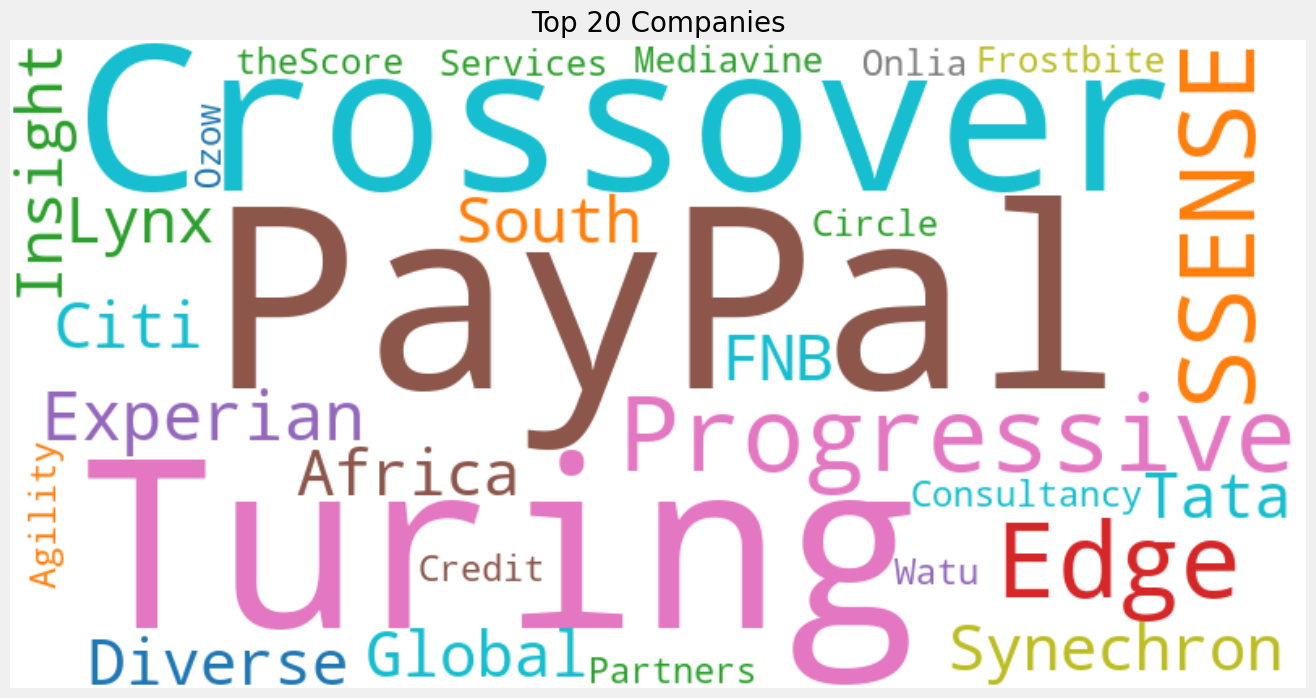

In [70]:
top_20_companies = df['company'].value_counts().head(20)
# Create a string of the top 20 words in title
wordcloud_string = ' '.join(top_20_companies.index)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10', max_words=50).generate(wordcloud_string)

# Plot the word cloud
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Companies', fontsize=20)
plt.show()


In [71]:
# Convert the 'posted_date' column to a datetime format and extract the month
df['month'] = pd.to_datetime(df['posted_date']).dt.month_name()

# Count the number of jobs posted in each month
job_counts_by_month = df['month'].value_counts().reset_index()
job_counts_by_month.columns = ['month', 'count']

# Sort the months by their chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
job_counts_by_month['month'] = pd.Categorical(job_counts_by_month['month'], categories=month_order, ordered=True)
job_counts_by_month = job_counts_by_month.sort_values('month')

# Create a bar chart using Plotly Express
fig = px.bar(job_counts_by_month, x='month', y='count',
             color='count', color_continuous_scale='Teal_r',
             template='simple_white',
             title='Number of Jobs Posted by Month',
             labels={'month':'Month', 'count':'Number of Jobs Posted'})
fig.update_layout(showlegend=False)
fig.show()
# #####################################################
df.posted_date = pd.to_datetime(df.posted_date)
# Create a new DataFrame with count of jobs posted per month
df_posted_month = df.groupby(pd.Grouper(key='posted_date', freq='M')).size().reset_index(name='counts')

# Create a line chart using plotly express
fig = px.line(df_posted_month, x='posted_date', y='counts', template="simple_white", 
              title='Job Postings by Month(Growth Pattern)', labels={'posted': 'Month', 'counts': 'Count of Job Postings'})

# fig.update_xaxes(
#     dtick="M1",
#     tickformat="%b\n%Y",
#     rangebreaks=[
#         dict(bounds=["sat", "mon"]), # Hide weekends
#     ]
# )

fig.show()
# In the code above, we first group the original DataFrame df by the posted column with a frequency of M (month) using pd.Grouper and groupby method, and then use size() method to count the number of rows in each group. We then reset the index and rename the

C:\Users\shivh\AppData\Local\Temp\ipykernel_5976\3802307307.py:25: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



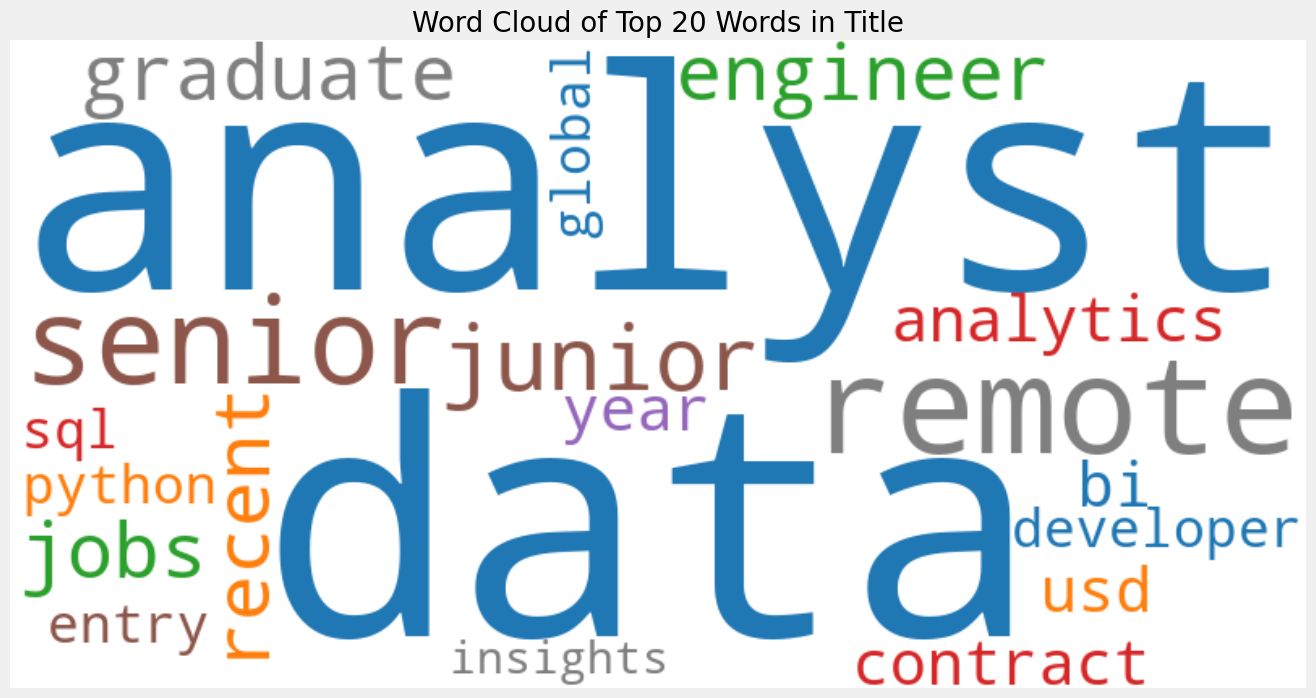

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of the top 20 words in title
wordcloud_string = ' '.join(top_20_words_in_title.index)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(wordcloud_string)

# Plot the word cloud
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 20 Words in Title', fontsize=20)
plt.show()

In [73]:
# description words frequency
description_words_frequency = df.description.str.split(expand=True).stack() # split description to words
description_words_frequency_df = pd.DataFrame(description_words_frequency.value_counts())  # create new dataframe 

index_filter = [i  for i in description_words_frequency_df.index if i not in stopwords.words("english")]  # get index of rows doesn't have stop words

description_words_frequency_df_without_stop_word = description_words_frequency_df.loc[index_filter] # get rows doesn't have stop words
description_words_frequency_df_without_stop_word = description_words_frequency_df_without_stop_word.rename(columns={0:'Counts'}) # rename column to 'Counts'

# Frequency of top 20 words in description
top_20_words_in_description = description_words_frequency_df_without_stop_word.iloc[:20]

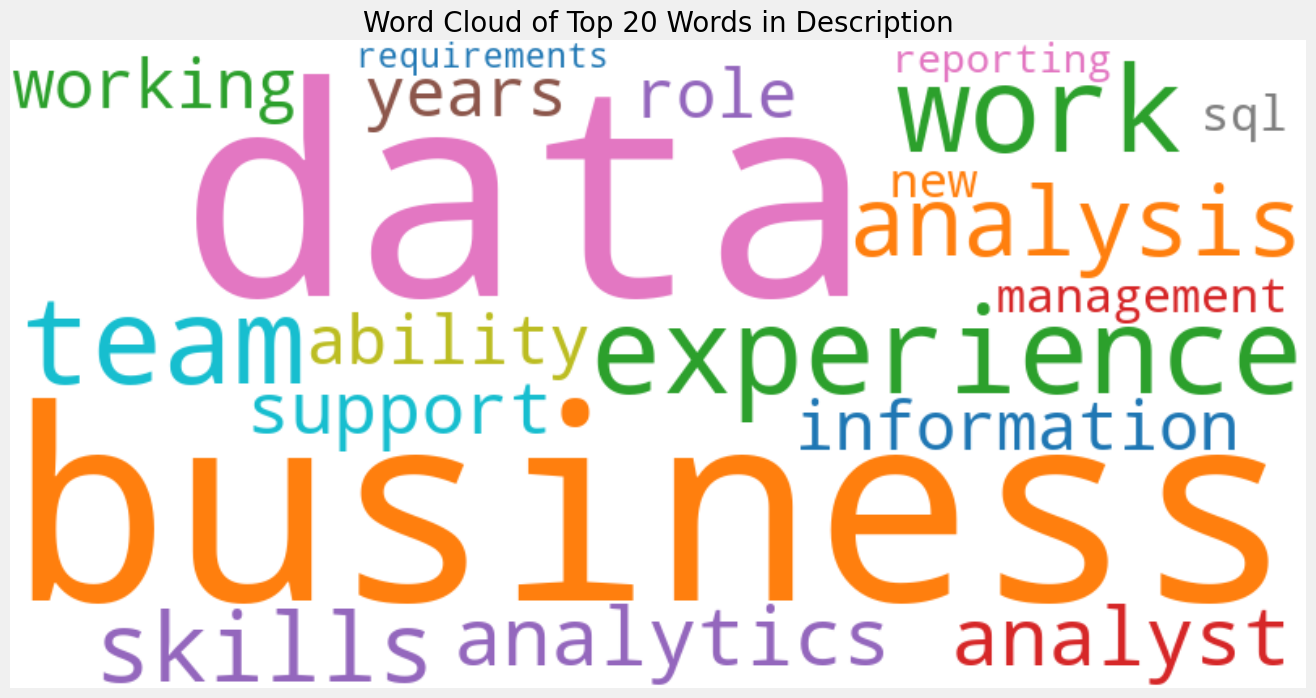

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of the top 20 words in title
wordcloud_string = ' '.join(top_20_words_in_description.index)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(wordcloud_string)

# Plot the word cloud
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 20 Words in Description', fontsize=20)
plt.show()

In [75]:
df_job_type = df.groupby(by=["Location_name", "onsite_remote"], as_index=False).agg(
    {"criteria": "count"}
)
df_job_type = df_job_type.rename(columns={"criteria":'Counts'})

In [76]:
fig = px.bar(df_job_type , 
             y=df_job_type.Counts, 
             x=df_job_type.onsite_remote, 
             template=  "simple_white"  ,
             color = df_job_type.onsite_remote,
             color_discrete_sequence = px.colors.sequential.Teal_r,  
             facet_col=df_job_type.Location_name,
             labels={'onsite_remote':'Job Type', 'Counts':"Count of posted jobs"},
             text=['{}'.format(p) for p in df_job_type.Counts]
            )

fig.update_layout(coloraxis_showscale=False)
fig.show()

In [77]:
df_Seniority_level = df.groupby(by=["Location_name", "Seniority_level"], as_index=False).agg(
    {"criteria": "count"}
)
df_Seniority_level = df_Seniority_level.rename(columns={"criteria":'Counts'})
df_Seniority_level = df_Seniority_level.sort_values(by='Counts',ascending = False)

In [78]:
# fig = px.bar(df_Seniority_level , 
#              y=df_Seniority_level.Counts, 
#              x=df_Seniority_level.Seniority_level, 
#              template=  "simple_white"  ,
#              title= "Counts of posted jobs based on seniority level",
#              color = df_Seniority_level.Location_name,
#              color_discrete_sequence = px.colors.sequential.Teal_r,  
#              #facet_col=df_Seniority_level.Location_name,
#              labels={'Seniority_level':'Seniority Level', 'Counts':"Count of posted jobs"},
#              text=['{}'.format(p) for p in df_Seniority_level.Counts]
#             )

# fig.update_layout(coloraxis_showscale=False, barmode='group')
# fig.show()


# Filter out "Not Applicable" from the dataframe
df_Seniority_level = df_Seniority_level[df_Seniority_level['Seniority_level'] != "Not Applicable"]

# Create the bar chart
fig = px.bar(df_Seniority_level , 
             y='Counts', 
             x='Seniority_level', 
             template= "simple_white",  
             color='Location_name',
             color_discrete_sequence=px.colors.sequential.Teal_r,
             labels={'Seniority_level':'Seniority Level', 'Counts':"Count of posted jobs"},
             text=['{}'.format(p) for p in df_Seniority_level.Counts]
            )

fig.update_layout(coloraxis_showscale=False, barmode='group')
fig.show()
# This code filters out any rows in df_Seniority_level where the Seniority_level is "Not Applicable" before creating the plot.